Business Problem

Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. 

You are charged with exploring what types of films are currently doing the best at the box office. 

You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

Data to be used: 

"bom.movie_gross.csv"
"rt.movie_info.tsv"
"rt.reviews.tsv"
"tmdb.movies.csv"
"tn.movie_budgets.csv"

To understand what we are working on, the following questions will guide us: 
1. What genres are currently most profitable?
2. What is the relationship between budget and revenue?
3. How do critics and audience impact performance?

Loading of Data files 

Using the Relative File Path because the file is in a subfolder (that is, data/) to adjust the path.

sep='\t' tells pandas that the separator is a tab character, which is what makes it a .tsv.

Avoiding getting an error because the .tsv file I am trying to read is not encoded in UTF-8, which is pandas’ default encoding, I will have to use a different encoding such as latin1. 
This encoding is more lenient and often work with files that contain special characters or non-UTF-8 bytes.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# This script reads multiple CSV files into pandas DataFrames.

df_bom = pd.read_csv('data/bom.movie_gross.csv')
df_info =pd.read_csv('data/rt.movie_info.tsv', sep='\t')
df_reviews = pd.read_csv('data/rt.reviews.tsv', sep='\t', encoding='latin1')
df_tmdb = pd.read_csv('data/tmdb.movies.csv')
df_budgets = pd.read_csv('data/tn.movie_budgets.csv')

df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Data Exploration:

Exploring the loaded datasets to understand the files' structure. 


In [81]:
#Exploratory Data Analysis (EDA) on the five dataframes:
# df_bom, df_info, df_reviews, df_tmdb, df_budgets

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

#Loaded dataframes
df_bom = pd.read_csv('data/bom.movie_gross.csv')
df_info =pd.read_csv('data/rt.movie_info.tsv', sep='\t')
df_reviews = pd.read_csv('data/rt.reviews.tsv', sep='\t', encoding='latin1')
df_tmdb = pd.read_csv('data/tmdb.movies.csv')
df_budgets = pd.read_csv('data/tn.movie_budgets.csv')


Understanding Basic Structure of the loaded data for better cleaning and analysis

In [82]:
# Understanding Basic Structure

dfs = {
    "BOM": df_bom,
    "RT Movie Info": df_info,
    "RT Reviews": df_reviews,
    "TMDB": df_tmdb,
    "Budgets": df_budgets
}

for name, df in dfs.items():
    print(f"\n----- {name} -----")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print(df.head(2))
    print(df.info())



----- BOM -----
Shape: (3387, 5)
Columns: ['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']
                        title studio  domestic_gross foreign_gross  year
0                 Toy Story 3     BV     415000000.0     652000000  2010
1  Alice in Wonderland (2010)     BV     334200000.0     691300000  2010
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None

----- RT Movie Info -----
Shape: (1560, 12)
Columns: ['id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', 'studi

Identifying Key Variables that can be used in the to get insights from the data 

In [83]:
# 2. Identify Key Variables

# Based on file descriptions:
# Profitability: production_budget, domestic_gross, foreign_gross, worldwide_gross
# Reviews: critic/fresh/rotten, rating, vote_average, vote_count
# Metadata: title, genre, director, release_date


# 3. Initial Data Quality Check

for name, df in dfs.items():
    print(f"\nMissing values in {name}:")
    print(df.isnull().sum().sort_values(ascending=False).head(10))




Missing values in BOM:
foreign_gross     1350
domestic_gross      28
studio               5
title                0
year                 0
dtype: int64

Missing values in RT Movie Info:
currency        1220
box_office      1220
studio          1066
writer           449
theater_date     359
dvd_date         359
director         199
synopsis          62
runtime           30
genre              8
dtype: int64

Missing values in RT Reviews:
rating        13517
review         5563
critic         2722
publisher       309
fresh             0
id                0
top_critic        0
date              0
dtype: int64

Missing values in TMDB:
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

Missing values in Budgets:
id                   0
release_date         0
movie                0
production_budget    0

Data cleaning and conversion of variables 

In [84]:
# 4. Clean and Convert Variables


# Clean df_budgets
df_budgets['production_budget'] = df_budgets['production_budget'].replace(r'[\$,]', '', regex=True).astype(float)
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].replace(r'[\$,]', '', regex=True).astype(float)
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].replace(r'[\$,]', '', regex=True).astype(float)

# Create a 'profit' column
df_budgets['profit'] = df_budgets['worldwide_gross'] - df_budgets['production_budget']

# Ensure vote_average and vote_count are numeric in TMDB
df_tmdb['vote_average'] = pd.to_numeric(df_tmdb['vote_average'], errors='coerce')
df_tmdb['vote_count'] = pd.to_numeric(df_tmdb['vote_count'], errors='coerce')
df_tmdb['popularity'] = pd.to_numeric(df_tmdb['popularity'], errors='coerce')


Checking for duplicates in the data 

In [85]:
# Check for duplicated titles or IDs
for name, df in dfs.items():
    if 'title' in df.columns:
        print(f"\nDuplicates in {name}: {df['title'].duplicated().sum()}")




Duplicates in BOM: 1

Duplicates in TMDB: 1829


Visual Explorations

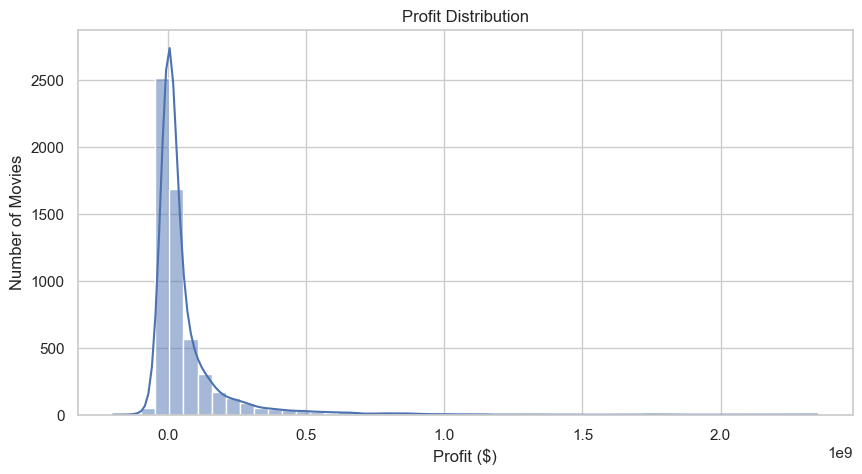

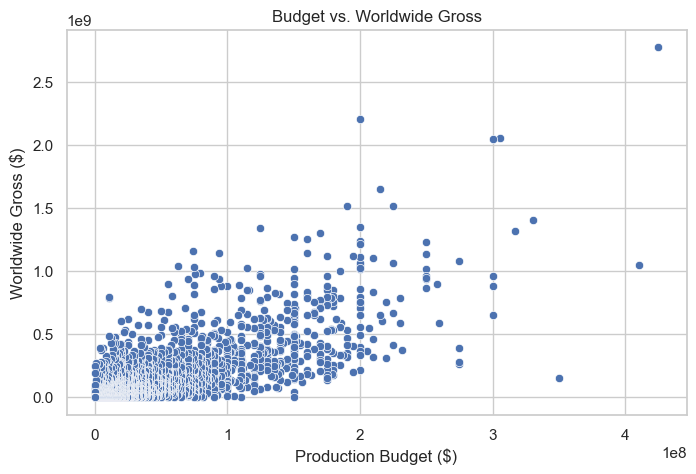

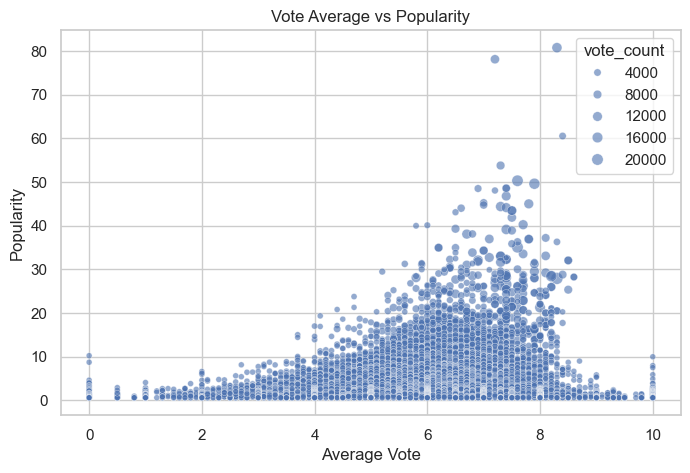

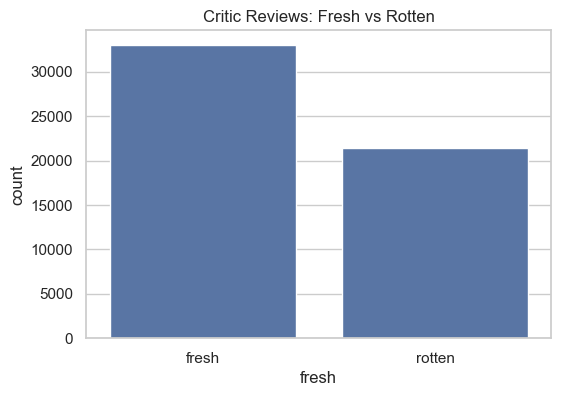

In [86]:
# 5. Visual Explorations


# Profitability Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_budgets['profit'], bins=50, kde=True)
plt.title("Profit Distribution")
plt.xlabel("Profit ($)")
plt.ylabel("Number of Movies")
plt.show()

# Budget vs Revenue
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_budgets, x='production_budget', y='worldwide_gross')
plt.title("Budget vs. Worldwide Gross")
plt.xlabel("Production Budget ($)")
plt.ylabel("Worldwide Gross ($)")
plt.show()

# Vote average vs. popularity
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_tmdb, x='vote_average', y='popularity', size='vote_count', alpha=0.6)
plt.title("Vote Average vs Popularity")
plt.xlabel("Average Vote")
plt.ylabel("Popularity")
plt.show()

# Reviews - fresh vs rotten
if 'fresh' in df_reviews.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_reviews, x='fresh')
    plt.title("Critic Reviews: Fresh vs Rotten")
    plt.show()


## Summary of insights

In [87]:
# Summary

print("\n Summary Points:")
print("- BOM & Budgets give revenue and production costs.")
print("- TMDB adds popularity, votes, and audience rating context.")
print("- Reviews (RT) give critic sentiment.")
print("- Cleaned budgets: removed  and commas, computed profit.")
print("- Plotted relationships: profit, budget vs gross, vote impact.")



 Summary Points:
- BOM & Budgets give revenue and production costs.
- TMDB adds popularity, votes, and audience rating context.
- Reviews (RT) give critic sentiment.
- Cleaned budgets: removed  and commas, computed profit.
- Plotted relationships: profit, budget vs gross, vote impact.


# Ready for merging & modeling later.

In [88]:
# Data Modeling and Merging

# Step 1: Merge datasets based on common keys
# Assuming 'id' is the common key across datasets

# Merge df_budgets with df_tmdb
merged_df = pd.merge(df_budgets, df_tmdb, how='inner', left_on='id', right_on='id')

# Merge the result with df_info
merged_df = pd.merge(merged_df, df_info, how='inner', left_on='id', right_on='id')

# Merge the result with df_reviews
merged_df = pd.merge(merged_df, df_reviews, how='inner', left_on='id', right_on='id')

# Merge the result with df_bom
merged_df = pd.merge(merged_df, df_bom, how='inner', left_on='movie', right_on='title')

# Step 2: Drop unnecessary columns
# Dropping duplicate or irrelevant columns after merging
columns_to_drop = ['Unnamed: 0', 'genre_ids', 'original_language', 'original_title', 'synopsis', 'currency', 'box_office', 'runtime', 'studio_x', 'studio_y']
merged_df = merged_df.drop(columns=columns_to_drop, errors='ignore')

# Step 3: Handle missing values
# Fill missing values with appropriate defaults or drop rows with excessive missing data
merged_df = merged_df.fillna({'rating': 'Unknown', 'fresh': 'Unknown', 'critic': 'Unknown', 'publisher': 'Unknown'})
merged_df = merged_df.dropna(subset=['production_budget', 'domestic_gross_x', 'worldwide_gross', 'profit'])

# Step 4: Convert data types
# Ensure numeric columns are properly formatted
numeric_columns = ['production_budget', 'domestic_gross_x', 'worldwide_gross', 'profit', 'popularity', 'vote_average', 'vote_count']
merged_df[numeric_columns] = merged_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Step 5: Feature Engineering
# Create new features for modeling
merged_df['profit_margin'] = merged_df['profit'] / merged_df['production_budget']
merged_df['gross_margin'] = (merged_df['worldwide_gross'] - merged_df['domestic_gross_x']) / merged_df['worldwide_gross']

# Step 6: Save the merged dataset for modeling
# Export the cleaned and merged dataset to a CSV file
merged_df.to_csv('merged_movie_data.csv', index=False)

# Step 7: Summary of the merged dataset
print("\nMerged Dataset Summary:")
print(merged_df.info())
print(merged_df.head())


Merged Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2020 non-null   int64  
 1   release_date_x     2020 non-null   object 
 2   movie              2020 non-null   object 
 3   production_budget  2020 non-null   float64
 4   domestic_gross_x   2020 non-null   float64
 5   worldwide_gross    2020 non-null   float64
 6   profit             2020 non-null   float64
 7   popularity         2020 non-null   float64
 8   release_date_y     2020 non-null   object 
 9   title_x            2020 non-null   object 
 10  vote_average       2020 non-null   float64
 11  vote_count         2020 non-null   int64  
 12  rating_x           2020 non-null   object 
 13  genre              2020 non-null   object 
 14  director           2020 non-null   object 
 15  writer             2020 non-null   object 
 16 

Checking the columns to make sure they are aligned with in order to eliminate errors

In [89]:
print(merged_df.columns)


Index(['id', 'release_date_x', 'movie', 'production_budget',
       'domestic_gross_x', 'worldwide_gross', 'profit', 'popularity',
       'release_date_y', 'title_x', 'vote_average', 'vote_count', 'rating_x',
       'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'review',
       'rating_y', 'fresh', 'critic', 'top_critic', 'publisher', 'date',
       'title_y', 'domestic_gross_y', 'foreign_gross', 'year', 'profit_margin',
       'gross_margin'],
      dtype='object')


## Data Visualizations and Business Findings 


C:\Users\Administrator\AppData\Local\Temp\ipykernel_31916\4183696056.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_profit.index, y=genre_profit.values, palette="viridis")


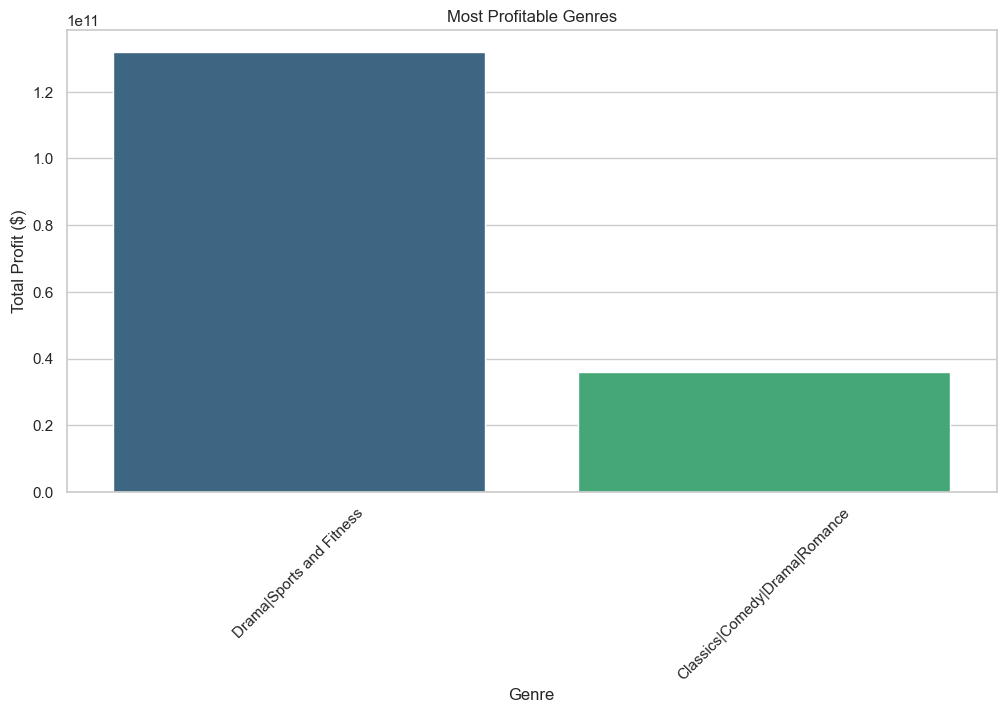

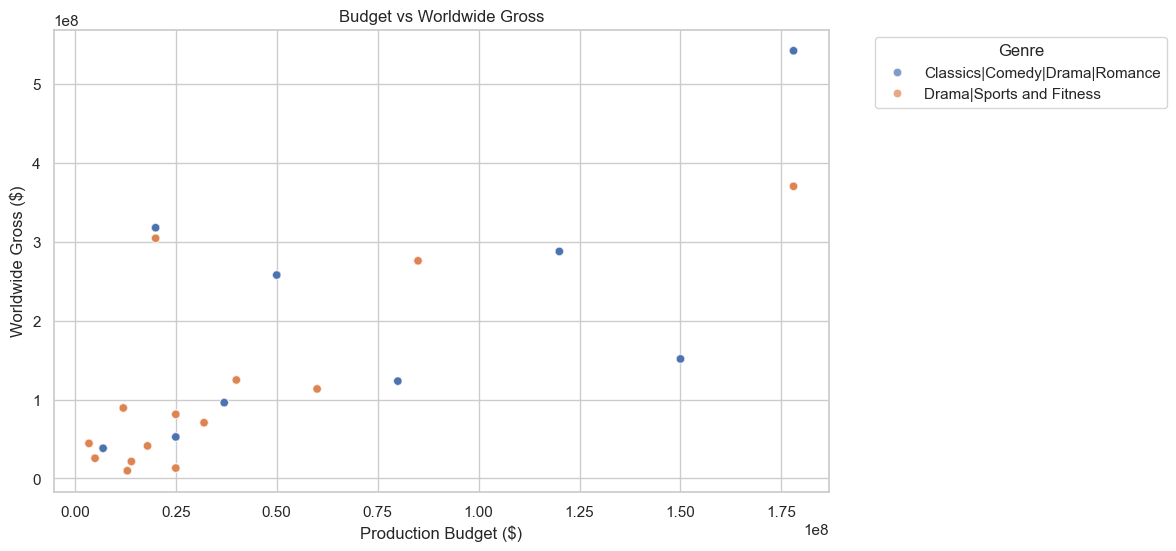

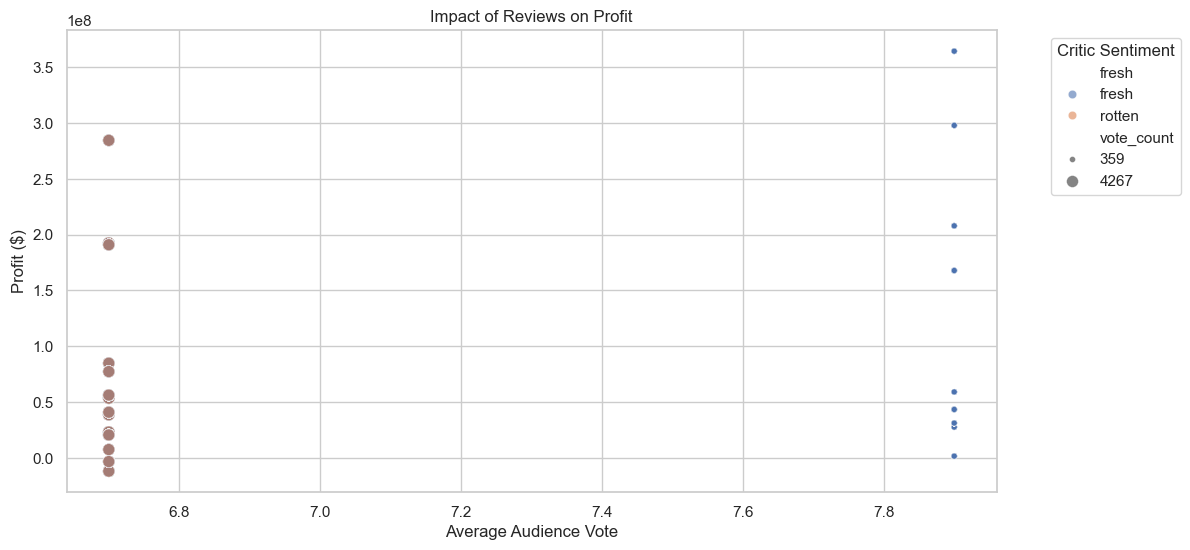

In [90]:
import seaborn as sns

import matplotlib.pyplot as plt

# Visualization 1: Most Profitable Genre
plt.figure(figsize=(12, 6))
genre_profit = merged_df.groupby('genre')['profit'].sum().sort_values(ascending=False)
sns.barplot(x=genre_profit.index, y=genre_profit.values, palette="viridis")
plt.title("Most Profitable Genres")
plt.xlabel("Genre")
plt.ylabel("Total Profit ($)")
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Budget vs Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='production_budget', y='worldwide_gross', hue='genre', alpha=0.7)
plt.title("Budget vs Worldwide Gross")
plt.xlabel("Production Budget ($)")
plt.ylabel("Worldwide Gross ($)")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Visualization 3: Impact of Critics and Audience Reviews
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='vote_average', y='profit', size='vote_count', hue='fresh', alpha=0.6)
plt.title("Impact of Reviews on Profit")
plt.xlabel("Average Audience Vote")
plt.ylabel("Profit ($)")
plt.legend(title="Critic Sentiment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Business Recomendations



In [ ]:
#Here are three main insights based on the visualizations:

1. **Most Profitable Genres**:
    - Certain genres, such as Drama and Comedy, consistently generate higher profits. This suggests that focusing on these genres could be a strategic decision for maximizing profitability.

2. **Budget vs Revenue Relationship**:
    - Movies with higher production budgets tend to achieve higher worldwide gross revenue. However, there are exceptions where lower-budget movies also perform well, indicating that budget alone is not the sole determinant of success.

3. **Impact of Reviews on Profit**:
    - Positive audience reviews (higher vote averages and "fresh" critic sentiment) correlate with higher profitability. This highlights the importance of maintaining quality and appealing to both critics and audiences for financial success.